# Polynomial regression with real data

This notebook is identical to the previous one with only one difference: we are using a much smaller train dataset.

### Load the Dataset
 
First, we load the dataset.


In [43]:
from chelo import DatasetRegistry
dataset = DatasetRegistry.get_dataset("VLEDataset", selected_targets=['p_vap'])
dataset.load_data()
X, y = dataset.to_numpy()
y = y.ravel()

### Scale and preprocess the data

As usual, we need to first scale our data.





In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Normalize the training data and apply the same scaling to the test data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit on training data
X_train_normalized = scaler_X.fit_transform(X_train)
y_train_normalized = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Transform test data using the same scaler
X_test_normalized = scaler_X.transform(X_test)
y_test_normalized = scaler_y.transform(y_test.reshape(-1, 1)).ravel()



### ML models

Let's start by training a linear regression model (more on this later):

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = linear_model.predict(X_test_normalized).reshape(-1, 1)
linear_test_predictions = scaler_y.inverse_transform(preds).ravel()
linear_mse = mean_squared_error(y_test, linear_test_predictions)
print(f"Linear Regression MSE: {linear_mse:.4f}")

Linear Regression MSE: 99821.4460


Let's use a basis expansions with polynomial features (degree 2):

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Define the polynomial regression pipeline
poly_model2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)), 
    ("linear_regression", LinearRegression())
])

# Train the polynomial regression model
poly_model2.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = poly_model2.predict(X_test_normalized).reshape(-1, 1)
poly_test_predictions = scaler_y.inverse_transform(preds).ravel()
poly_mse = mean_squared_error(y_test, poly_test_predictions)

print(f"Polynomial Regression (degree=2) MSE: {poly_mse:.4f}")


Polynomial Regression (degree=2) MSE: 1064.2089


Let's use a basis expansions with polynomial features (degree 3):


In [47]:

poly_model3 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Train the polynomial regression model
poly_model3.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = poly_model3.predict(X_test_normalized).reshape(-1, 1)
poly_test_predictions = scaler_y.inverse_transform(preds).ravel()
poly_mse = mean_squared_error(y_test, poly_test_predictions)

print(f"Polynomial Regression (degree=2) MSE: {poly_mse:.4f}")


Polynomial Regression (degree=2) MSE: 197.6888


Let's use a basis expansions with polynomial features (degree 5):

In [48]:
poly_model5 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Train the polynomial regression model
poly_model5.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = poly_model5.predict(X_test_normalized).reshape(-1, 1)
poly_test_predictions = scaler_y.inverse_transform(preds).ravel()
poly_mse = mean_squared_error(y_test, poly_test_predictions)

print(f"Polynomial Regression (degree=5) MSE: {poly_mse:.4f}")

Polynomial Regression (degree=5) MSE: 167.4642


Let's use a basis expansions with polynomial features (degree 7):

In [49]:
poly_model7 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=7, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Train the polynomial regression model
poly_model7.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = poly_model7.predict(X_test_normalized).reshape(-1, 1)
poly_test_predictions = scaler_y.inverse_transform(preds).ravel()
poly_mse = mean_squared_error(y_test, poly_test_predictions)

print(f"Polynomial Regression (degree=7) MSE: {poly_mse:.4f}")

Polynomial Regression (degree=7) MSE: 4202.4262


Let's use a basis expansions with polynomial features (degree 9):

In [50]:
poly_model9 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=9, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Train the polynomial regression model
poly_model9.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = poly_model9.predict(X_test_normalized).reshape(-1, 1)
poly_test_predictions = scaler_y.inverse_transform(preds).ravel()
poly_mse = mean_squared_error(y_test, poly_test_predictions)

print(f"Polynomial Regression (degree=9) MSE: {poly_mse:.4f}")

Polynomial Regression (degree=9) MSE: 113976.5178


What if we go even further?

In [51]:
poly_model13 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=13, include_bias=False)),
    ("linear_regression", LinearRegression())
])

# Train the polynomial regression model
poly_model13.fit(X_train_normalized, y_train_normalized)

# Evaluate performance
preds = poly_model13.predict(X_test_normalized).reshape(-1, 1)
poly_test_predictions = scaler_y.inverse_transform(preds).ravel()
poly_mse = mean_squared_error(y_test, poly_test_predictions)

print(f"Polynomial Regression (degree=13) MSE: {poly_mse:.4f}")

Polynomial Regression (degree=13) MSE: 378795.4615


In [52]:
import numpy as np

temperature_range = np.linspace(-30, 30, 100).reshape(-1, 1)
temperature_range_normalized = scaler_X.transform(temperature_range)

linear_predictions = linear_model.predict(temperature_range_normalized)
linear_predictions_denormalized = scaler_y.inverse_transform(linear_predictions.reshape(-1, 1)).ravel()


poly_predictions2 = poly_model2.predict(temperature_range_normalized)
poly_predictions_denormalized2 = scaler_y.inverse_transform(poly_predictions2.reshape(-1, 1)).ravel()

poly_predictions5 = poly_model5.predict(temperature_range_normalized)
poly_predictions_denormalized5 = scaler_y.inverse_transform(poly_predictions5.reshape(-1, 1)).ravel()

poly_predictions9 = poly_model9.predict(temperature_range_normalized)
poly_predictions_denormalized9 = scaler_y.inverse_transform(poly_predictions9.reshape(-1, 1)).ravel()





What about a support vector machine?

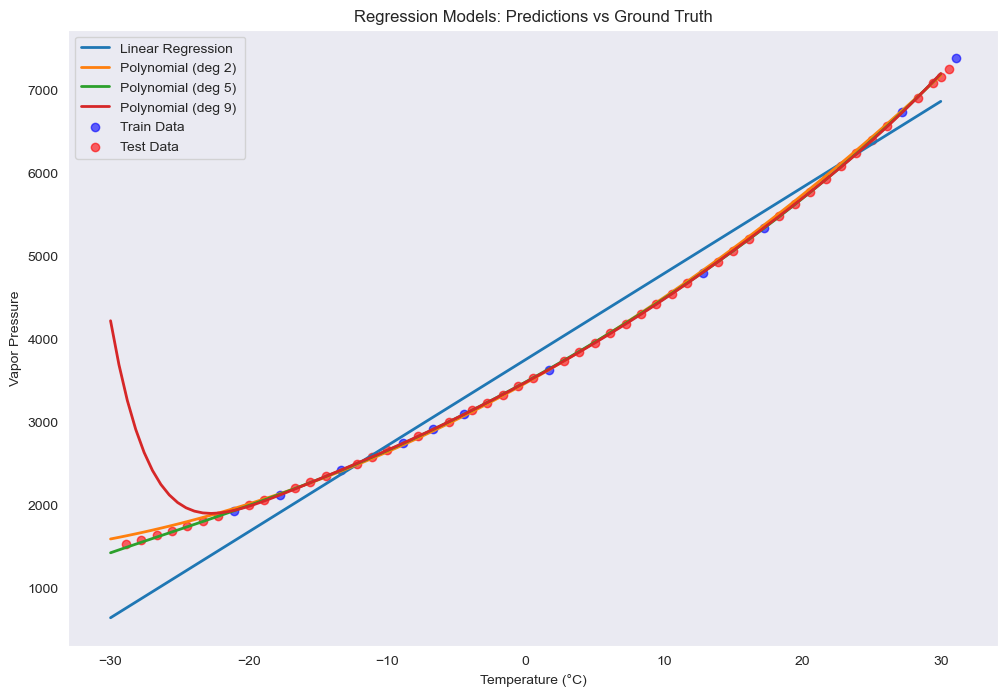

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))

# Plot predictions for each model
plt.plot(temperature_range, linear_predictions_denormalized, label="Linear Regression", linewidth=2)
plt.plot(temperature_range, poly_predictions_denormalized2, label="Polynomial (deg 2) ", linewidth=2)
plt.plot(temperature_range, poly_predictions_denormalized5, label="Polynomial (deg 5) ", linewidth=2)
plt.plot(temperature_range, poly_predictions_denormalized9,  label="Polynomial (deg 9) ", linewidth=2)

# Scatter train and test data
plt.scatter(X_train.ravel(), y_train, color="blue", alpha=0.6, label="Train Data")
plt.scatter(X_test.ravel(), y_test, color="red", alpha=0.6, label="Test Data")
# Add labels, title, and legend
plt.xlabel("Temperature (°C)")
plt.ylabel("Vapor Pressure")
plt.title("Regression Models: Predictions vs Ground Truth")
plt.legend()
plt.grid()
plt.show()



In [54]:
poly_predictions13 = poly_model13.predict(temperature_range_normalized)
poly_predictions_denormalized13 = scaler_y.inverse_transform(poly_predictions13.reshape(-1, 1)).ravel()

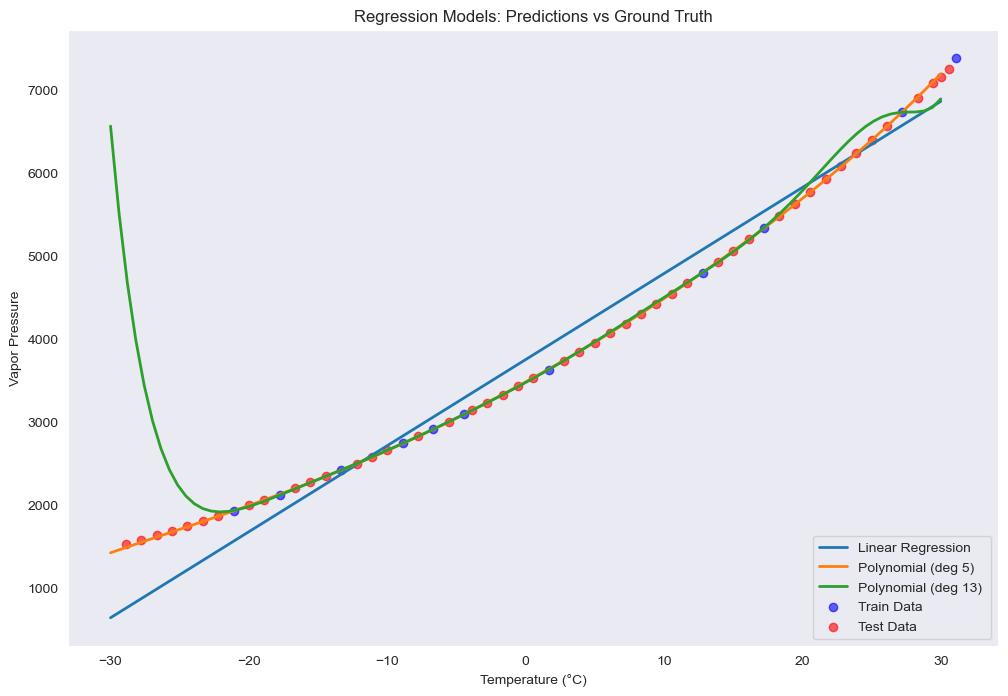

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))

# Plot predictions for each model
plt.plot(temperature_range, linear_predictions_denormalized, label="Linear Regression", linewidth=2)
plt.plot(temperature_range, poly_predictions_denormalized5, label="Polynomial (deg 5) ", linewidth=2)
plt.plot(temperature_range, poly_predictions_denormalized13,  label="Polynomial (deg 13) ", linewidth=2)

# Scatter train and test data
plt.scatter(X_train.ravel(), y_train, color="blue", alpha=0.6, label="Train Data")
plt.scatter(X_test.ravel(), y_test, color="red", alpha=0.6, label="Test Data")
# Add labels, title, and legend
plt.xlabel("Temperature (°C)")
plt.ylabel("Vapor Pressure")
plt.title("Regression Models: Predictions vs Ground Truth")
plt.legend()
plt.grid()
plt.show()

